#### Implement K-Nearest Neighbors Classification on Synthetic Data

In [3]:
import idx2numpy
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_regression
from K_Nearest_Neighbors import KNNClassifier, KNNRegressor
from KNN_utils import *

##### 1. Display plots that illustrate a KNN classification on linearly separable multi-class data

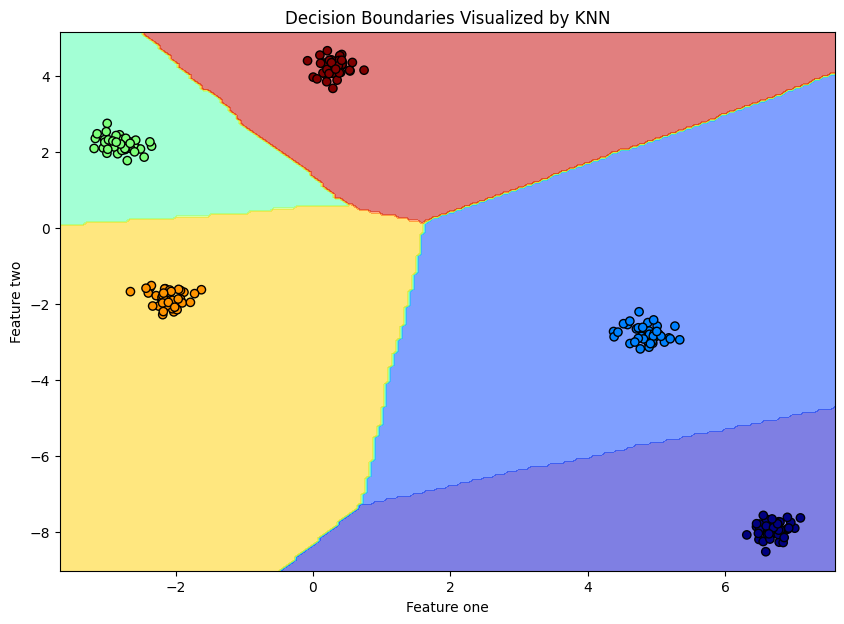

In [4]:
# Create training set.
X, y = make_blobs(n_samples=200, n_features=2, centers=5, cluster_std=0.2, random_state=44)

knn = KNNClassifier()
knn.fit(X,y)

create_contour_plot(knn, X, y, resolution=200, alpha=0.5)

##### 2. Display plots that illustrate a KNN classification on non-linearly separable multi-class data

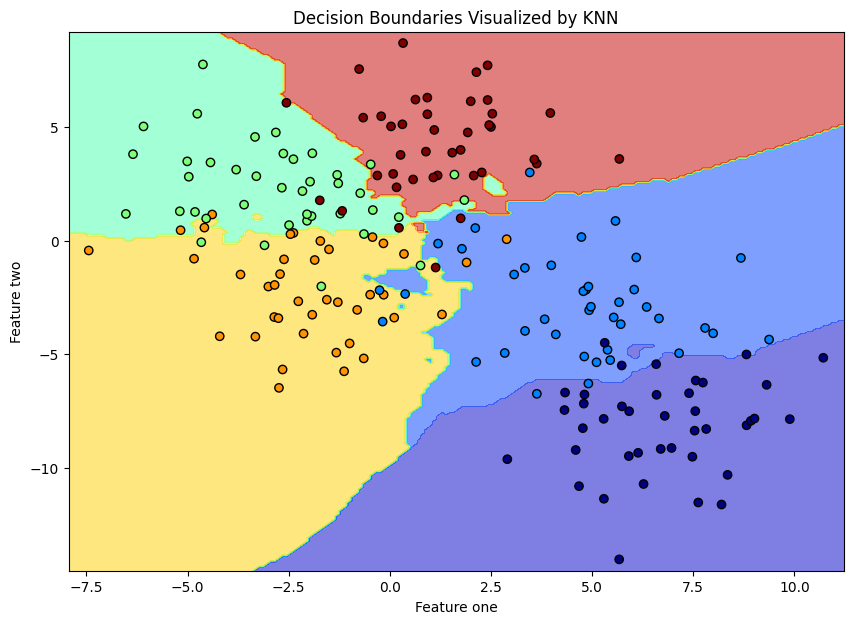

In [5]:
# Create training set.
X, y = make_blobs(n_samples=200, n_features=2, centers=5, cluster_std=2, random_state=44)

knn = KNNClassifier()
knn.fit(X,y)

create_contour_plot(knn, X, y, resolution=200, alpha=0.5)

#### Implement K-Nearest Neighbors Classification on Marketing Target

In [6]:
# Load Data
market_data = pd.read_csv('../dataset/Social_Network_Ads.csv', header=0)

# Remove the First Column
market_data = market_data.drop(market_data.columns[0], axis=1)

# Training Set
train_X = market_data.iloc[0:300, 0:-1].values
train_Y = market_data.iloc[0:300:, -1].values

# Test Set
test_X = market_data.iloc[300:, 0:-1].values
test_Y = market_data.iloc[300:, -1].values

# Standardize the Features for Both Training Set and Test Set
scaler = StandardScaler()

train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

              precision    recall  f1-score   support

           0       0.80      0.97      0.88        38
           1       0.98      0.85      0.91        62

    accuracy                           0.90       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.90      0.90       100



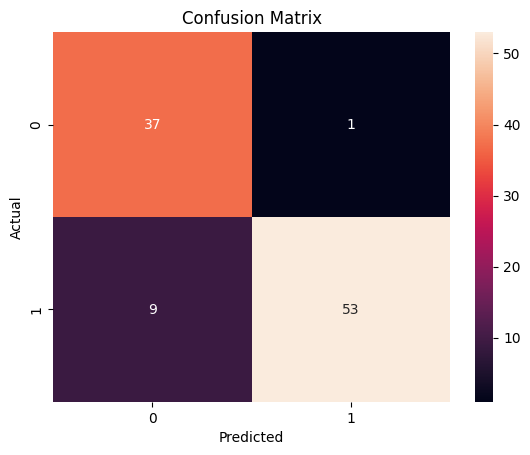

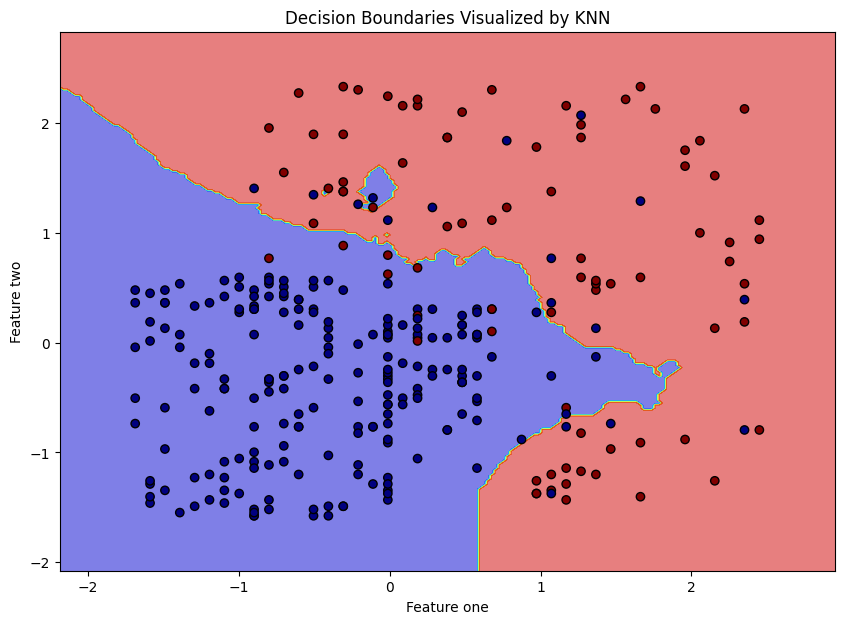

In [7]:
knn = KNNClassifier(k_neighbours=12)
knn.fit(train_X, train_Y)

# Evaluate model performance on testing data
pred_Y = knn.predict_class(test_X)
evaluate_model(test_Y, pred_Y, 'classification')

# Plot the decision boundary and the true labels
create_contour_plot(knn, train_X, train_Y, resolution=200, alpha=0.5)

#### Implement K-Nearest Neighbors Classification on Hand Written Digits

In [8]:
# Load Training and Testing Data Sets
try:
    train_set = idx2numpy.convert_from_file(
        '../dataset/train-images.idx3-ubyte')
    train_label = idx2numpy.convert_from_file(
        '../dataset/train-labels.idx1-ubyte')
    test_set = idx2numpy.convert_from_file(
        '../dataset/t10k-images.idx3-ubyte')
    test_label = idx2numpy.convert_from_file(
        '../dataset/t10k-labels.idx1-ubyte')
except FileNotFoundError as e:
    print("One or more data files not found.")
    print(e)
    exit()
    
# Select first 1000 training and first 500 testing data
train_set = train_set[:1000]
train_label = train_label[:1000]
test_set = test_set[:500]
test_label = test_label[:500]

# Normalize input images
train_images = train_set / 255
test_images = test_set / 255

# Reshape image size from 2D to 1D
train_X = train_images.reshape(len(train_set), -1)
test_X = test_images.reshape(len(test_set), -1)

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        42
           1       0.76      1.00      0.86        67
           2       0.85      0.64      0.73        55
           3       0.84      0.71      0.77        45
           4       0.86      0.76      0.81        55
           5       0.88      0.74      0.80        50
           6       0.88      0.86      0.87        43
           7       0.81      0.96      0.88        49
           8       0.90      0.68      0.77        40
           9       0.75      0.89      0.81        54

    accuracy                           0.83       500
   macro avg       0.84      0.82      0.82       500
weighted avg       0.83      0.83      0.82       500



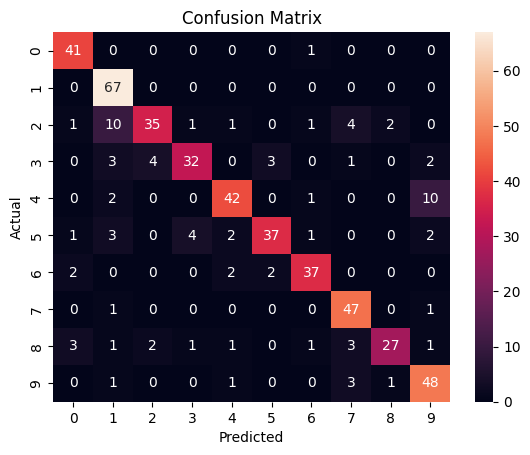

In [9]:
knn = KNNClassifier(k_neighbours=5)
knn.fit(train_X, train_label)

# Evaluate model performance on testing data
pred_Y = knn.predict_class(test_X)
evaluate_model(test_label, pred_Y, 'classification')

#### Implement K-Nearest Neighbors on Synthetic Data

##### 1. Implement K-Nearest neighbors on linear data

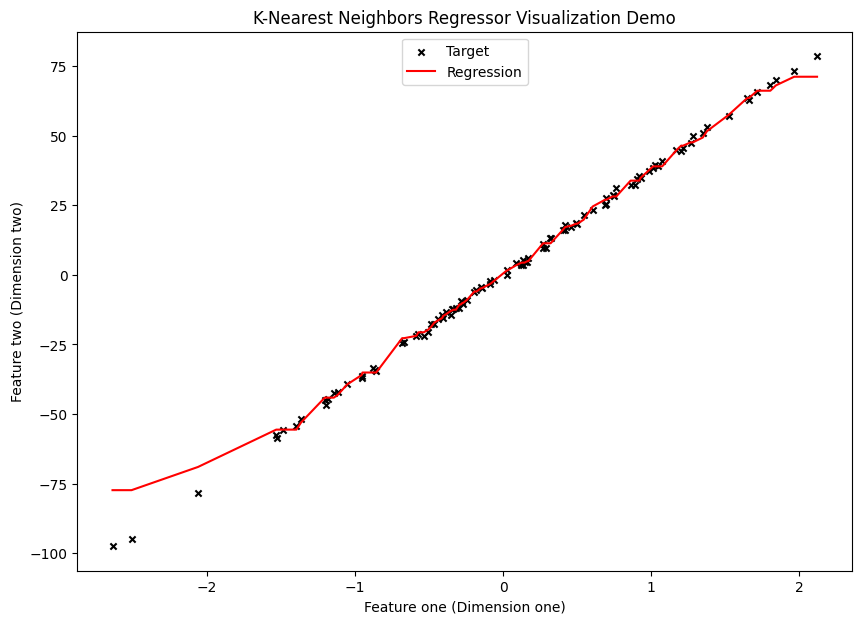

In [10]:
X, y = make_regression(n_samples=100, n_features=1, noise=1)

knn = KNNRegressor()
knn.fit(X, y)

# Plot regression and target points
create_regression_plot(knn, X, y)

##### 2. Implement K-Nearest neighbors with different numbers of neighbors (K) on nonlinear data

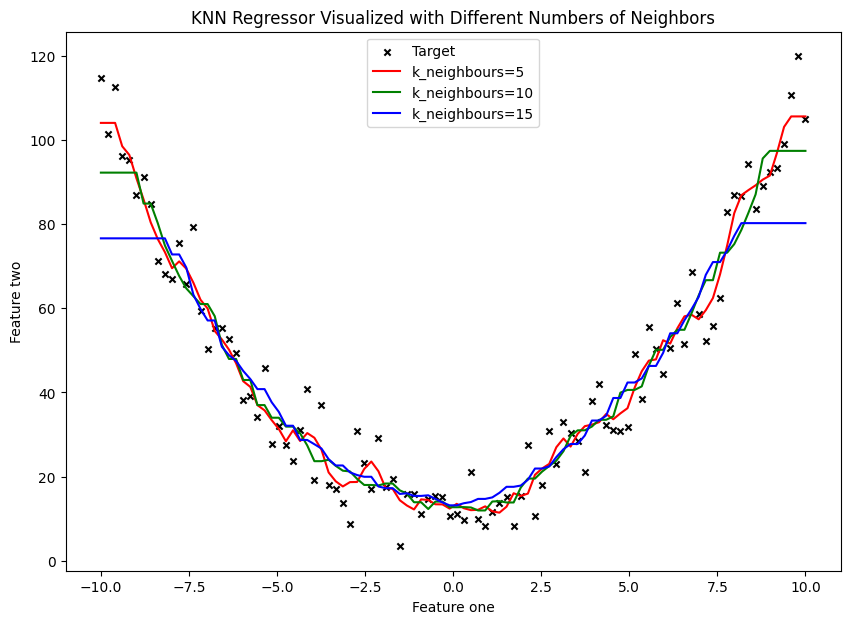

In [12]:
# Create the training set.
X = np.linspace(-10, 10, 100)
y = [x**2 + np.random.rand() * 25 for x in X]

# Fit the training set to each model with different regulation parameters
knn_one = KNNRegressor(k_neighbours=5)
knn_two = KNNRegressor(k_neighbours=10)
knn_three = KNNRegressor(k_neighbours=20)
knn_one.fit(X, y)
knn_two.fit(X, y)
knn_three.fit(X, y)

# Get the predictions of Regression Tree
pred_one = knn_one.predict_value(X)
pred_two = knn_two.predict_value(X)
pred_three = knn_three.predict_value(X)

# Plot the predictions of each model on the same set of axes.
plt.figure(figsize=(10, 7))

plt.scatter(X, y, s=20, c='black', marker='x', label='Target')
plt.plot(X, pred_one, c='red', label='k_neighbours=5')
plt.plot(X, pred_two, c='green', label='k_neighbours=10')
plt.plot(X, pred_three, c='blue', label='k_neighbours=20')

plt.legend(loc='upper center')
plt.xlabel('Feature one')
plt.ylabel('Feature two')
plt.title('KNN Regressor Visualized with Different Numbers of Neighbors')
plt.show()

#### Implement K-Nearest Neighbors on Predicting House Price

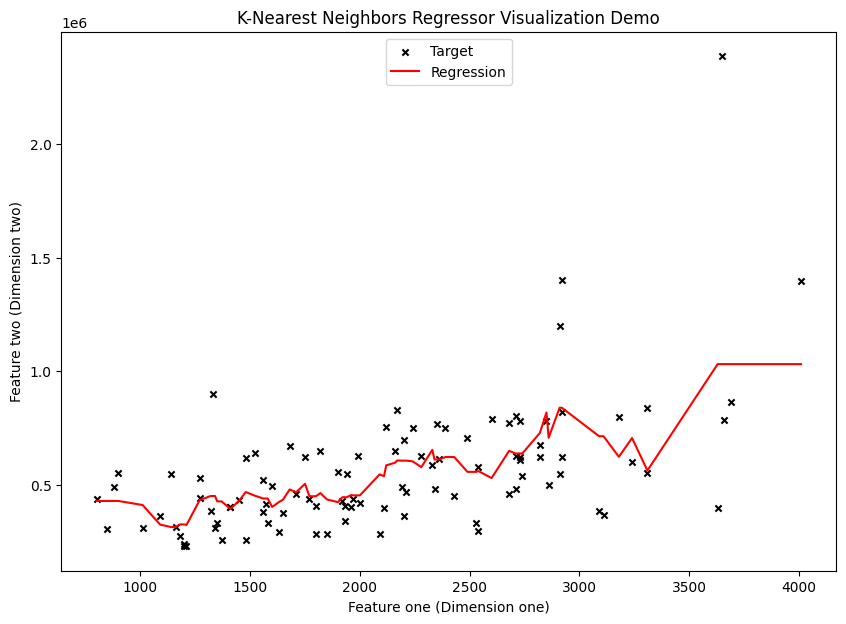

R-squared score (R²):  0.400825698085027


In [20]:
# Load Data
house_data = pd.read_csv('../dataset/house_price.csv')

# Select first 100 training and next 50 testing data
train_X = np.array(house_data['sqft_living'].head(100))
train_Y = np.array(house_data['price'].head(100))
test_X = np.array(house_data['sqft_living'].iloc[100:150])
test_Y = np.array(house_data['price'].iloc[100:150])

# Fit the model
knn = KNNRegressor(k_neighbours=7)
knn.fit(train_X, train_Y)

# Plot regression and target points
create_regression_plot(knn, train_X, train_Y)

# Evaluate model performance on testing data
pred_Y = knn.predict_value(test_X)
evaluate_model(test_Y, pred_Y, 'regression')